In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
df = pd.read_csv('digits/features.csv')
df

,label,h1,h2,h3,h4,h5,h6,h7
0,0,0.001140,1.677853e-07,3.187369e-11,9.366923e-12,-2.262365e-23,1.737756e-15,1.602606e-22
1,0,0.001177,2.043578e-07,1.317898e-11,3.145546e-12,1.344373e-23,1.371117e-15,1.514734e-23
2,0,0.001155,1.338587e-07,4.830630e-12,1.107123e-12,2.267684e-24,3.018875e-16,-1.188648e-24
3,0,0.001103,1.797438e-07,5.275442e-12,3.517707e-12,-1.457386e-23,7.144310e-16,4.151782e-24
4,0,0.002083,6.039155e-07,4.418106e-10,1.696764e-10,4.210888e-20,1.294257e-13,-1.962359e-20
...,...,...,...,...,...,...,...,...
1995,9,0.001493,3.104101e-07,8.757571e-11,6.845307e-11,-3.042837e-21,1.644519e-14,-4.339566e-21
1996,9,0.001087,1.855442e-08,5.528991e-11,3.988272e-11,-3.912308e-22,2.726597e-15,-1.831518e-21
1997,9,0.001025,1.111659e-07,3.009093e-11,1.884390e-11,3.093385e-22,5.283288e-15,3.250506e-22
1998,9,0.001194,3.791716e-07,9.671670e-11,3.411153e-11,1.863129e-21,2.091409e-14,-6.063287e-22


In [28]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

/tmp/ipykernel_101854/3704626254.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [30]:
X

array([[1.04475089e-01, 1.80387138e-03, 1.03170145e-04, ...,
        1.72277298e-05, 1.85012077e-03, 3.35861983e-01],
       [1.07870160e-01, 2.19706499e-03, 4.26582879e-05, ...,
        1.72282177e-05, 1.84995343e-03, 3.35861971e-01],
       [1.05866080e-01, 1.43912445e-03, 1.56359931e-05, ...,
        1.72280665e-05, 1.84946540e-03, 3.35861969e-01],
       ...,
       [9.39662497e-02, 1.19515239e-03, 9.73996383e-05, ...,
        1.72322202e-05, 1.85173905e-03, 3.35861996e-01],
       [1.09443128e-01, 4.07649994e-03, 3.13056809e-04, ...,
        1.72532383e-05, 1.85887337e-03, 3.35861920e-01],
       [1.09695449e-01, 4.10343574e-03, 4.44535973e-04, ...,
        1.73379650e-05, 1.87202491e-03, 3.35861702e-01]])

In [31]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [34]:
print("Accuracy: ", knn.score(X_test, y_test) * 100, '%')

Accuracy:  24.75 %


In [35]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)),
      "\nTest set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.52 
Test set score: 0.25


In [36]:
# find best number (N) of neighbors
param_grid = {'n_neighbors':[3,5,7,9,11]}
grid_search = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid)
grid_search.fit(X_train, y_train)
neighbors = grid_search.best_estimator_.n_neighbors
print('Best number of neighbors: ' + str(neighbors))

Best number of neighbors: 11


Maximum accuracy:- 0.2775 at K = 6


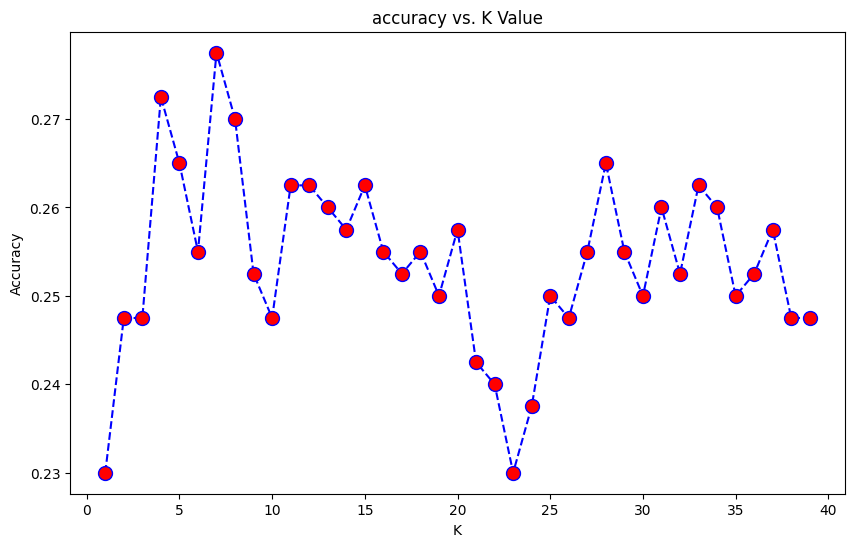

In [37]:
acc = []
# Will take some time

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [38]:
confusion_matrix(y_test, knn.predict(X_test))

array([[21,  1,  1,  4,  3,  3,  0,  0,  3,  0],
       [ 1, 38,  4,  1,  0,  2,  0,  1,  0,  0],
       [14,  1, 12, 10,  4,  2,  1,  1,  1,  0],
       [11,  1,  7, 10,  3,  2,  1,  1,  0,  0],
       [ 5,  1,  5,  9,  2,  5,  1,  1,  1,  4],
       [ 9,  8,  5,  6,  1,  1,  0,  0,  3,  1],
       [ 6,  2,  5,  7,  3,  0,  4,  1,  0,  5],
       [ 9,  7,  9,  9,  0,  4,  4,  1,  0,  1],
       [19,  1,  4,  5,  4,  4,  3,  1,  4,  3],
       [ 7,  1,  6, 11,  6,  2,  2,  0,  1,  6]])